<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/Week6/LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=f3499b5a05f9f5b29f7486e1eb29666335f545df4af46bd1ee411d1211a9b341
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from skfuzzy.control.controlsystem import Antecedent
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection


# Input variables
universe1 = np.linspace(10,36,61) # valve of setpoint for temperature
universe2 = np.linspace(0,60,61)  # valve of sensor
universe3 = np.linspace(0,255,61)  # valve of pwm 

# Define the membership functions for the input variables
setpoint=ctrl.Antecedent(universe1,'Setpoint')
sensor=ctrl.Antecedent(universe2,'Sensor')
# Define the membership functions for the output variable
pwm=ctrl.Consequent(universe3,'PWM')

name_setpoint=['cold','cool','normal','warm','hot']
name_sensor=['low','med','high']
name_pwm=['low','medium','high']

# paint diagram input and output 
setpoint.automf(names=name_setpoint)
sensor.automf(names=name_sensor)
pwm.automf(names=name_pwm)

# Define Rules
rule1 = ctrl.Rule(setpoint['cold'] & sensor['med'], pwm['low'])
rule2 = ctrl.Rule(setpoint['cold'] & sensor['low'], pwm['medium'])
rule3 = ctrl.Rule(setpoint['cold'] & sensor['high'],pwm['high'])

rule4 = ctrl.Rule(setpoint['cool'] & sensor['med'], pwm['medium'])
rule5 = ctrl.Rule(setpoint['cool'] & sensor['high'], pwm['high'])
rule6 = ctrl.Rule(setpoint['cool'] & sensor['low'], pwm['low'])

rule7 = ctrl.Rule(setpoint['warm'] & sensor['high'], pwm['low'])
rule8 = ctrl.Rule(setpoint['warm'] & sensor['med'], pwm['medium'])
rule9 = ctrl.Rule(setpoint['warm'] & sensor['low'],pwm['low'])

rule10 = ctrl.Rule(setpoint['normal'] & sensor['high'],pwm['high'])
rule11 = ctrl.Rule(setpoint['normal'] &  sensor['med'], pwm['medium'])
rule12 = ctrl.Rule(setpoint['normal'] &  sensor['low'], pwm['medium'])

rule13 = ctrl.Rule(setpoint['hot'] & sensor['high'],pwm['high'])
rule14 = ctrl.Rule(setpoint['hot'] &  sensor['med'], pwm['medium'])
rule15 = ctrl.Rule(setpoint['hot'] &  sensor['low'], pwm['medium'])

212.49999999999997


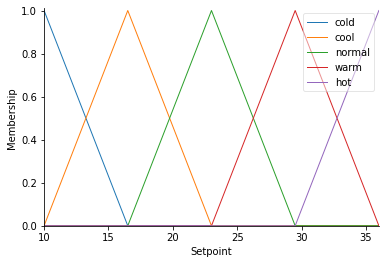

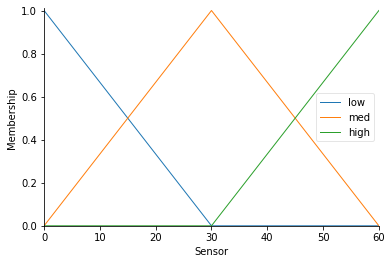

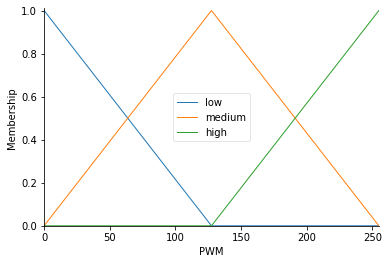

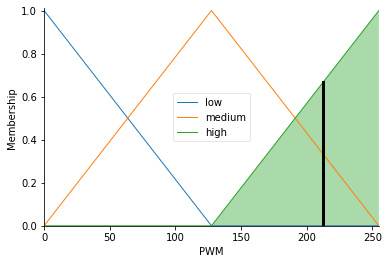

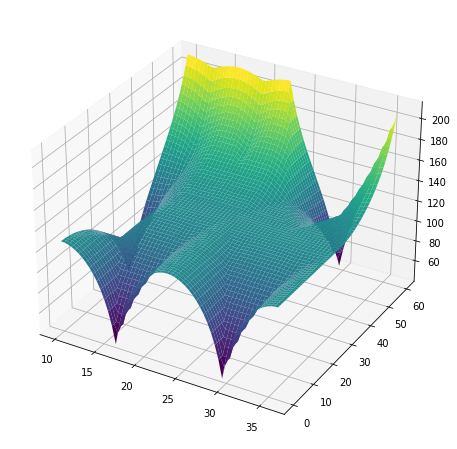

In [8]:
pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                               rule5, rule6, rule7, rule8, rule9, rule10,rule11,rule12,rule13,rule14,rule15])
pwm_simulation = ctrl.ControlSystemSimulation(pwm_ctrl,flush_after_run=61*61+1)

setpoint.view()
sensor.view()
pwm.view()

upsampledsetpoint = np.linspace(10,36,61)
upsampledsensor = np.linspace(0,60,61)
x,y = np.meshgrid(upsampledsetpoint,upsampledsensor)
z =np.zeros_like(x)
for i in range(61):
  for j in range(61):
      pwm_simulation.input['Setpoint']= x[i,j]
      pwm_simulation.input['Sensor']= y[i,j]
      pwm_simulation.compute()  
      z[i,j]=pwm_simulation.output['PWM']
print(pwm_simulation.output['PWM'])

pwm.view(sim = pwm_simulation)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1 ,cstride=1 ,cmap='viridis',linewidth=0.4,antialiased =True)
ax.view_init(30,-60)
